In [2]:
import pandas as pd

deniz = pd.read_csv('eylul2023.csv')
deniz = deniz[deniz['road_type'] == 'DENZ']
deniz

,_id,transition_date,transition_hour,transport_type_id,road_type,line,transfer_type,number_of_passage,number_of_passenger
27,28,2023-09-17,17,3,DENZ,EMINONU-KADIKOY,Aktarma,6,6
55,56,2023-09-17,16,3,DENZ,MALTEPE-ADALAR,Aktarma,1,1
68,69,2023-09-14,17,3,DENZ,CUBUKLU-ISTINYE,Aktarma,4,4
89,90,2023-09-22,12,3,DENZ,ANADOLU HISARI-KUCUKSU-ASIYAN,Normal,1,1
91,92,2023-09-19,19,3,DENZ,USKUDAR-EMINONU,Aktarma,25,25
...,...,...,...,...,...,...,...,...,...
4200571,4200572,2023-09-13,10,3,DENZ,KABATAS-Y.KADIKOY,Normal,2,2
4200590,4200591,2023-09-07,20,3,DENZ,ADALAR,Normal,93,93
4200594,4200595,2023-09-12,16,3,DENZ,ANADOLU HISARI-KUCUKSU-ASIYAN,Normal,3,3
4200595,4200596,2023-09-21,15,3,DENZ,ADALAR,Aktarma,9,9


In [3]:
lines = deniz.line.unique()
lines

array(['EMINONU-KADIKOY', 'MALTEPE-ADALAR', 'CUBUKLU-ISTINYE',
       'ANADOLU HISARI-KUCUKSU-ASIYAN', 'USKUDAR-EMINONU',
       'KARAKOY-KADIKOY', 'ESKIHISAR-TOPCULAR', 'ISTINYE-CUBUKLU',
       'BESIKTAS-USKUDAR', 'BOGAZ', 'BOSTANCI-ADALAR',
       'AVCILAR - BOSTANCI', 'USKUDAR-KABATAS', 'KADIKOY-EMINONU',
       'E.KADIKOY-BESIKTAS', 'USKUDAR-BOGAZ', 'KABATAS-ADALAR',
       'KABATAS-USKUDAR', 'ASIYAN-USKUDAR', 'ADALAR-KABATAS', 'ADALAR',
       'BARBAROS-E.KADIKOY', 'KARAKOY-USKUDAR', 'ADALAR-BOSTANCI',
       'KABATAS-Y.KADIKOY', 'Y.KADIKOY-EMINONU', 'KARAKOY-Y.KADIKOY',
       'USKUDAR-BESIKTAS', 'E.KADIKOY-ADALAR', 'Y.KADIKOY-KABATAS',
       'KARAKOY-BOSTANCI', 'CENGELKOY-KABATAS', 'EMINONU-USKUDAR',
       'BESIKTAS-ADALAR', 'USKUDAR-ORTAKOY', 'YENIKOY-BEYKOZ',
       'AVCILAR - BAKIRKOY-KADIKOY', 'Y.KADIKOY-KARAKOY', 'HALIC',
       'SIRKECI-HAREM', 'BOSTANCI-AVCILAR', 'BEYKOZ-YENIKOY',
       'BOSTANCI - MODA - KADIKOY - KABATAS', 'KADIKOY-ORTAKOY',
       'BOSTANCI-KABATAS

In [4]:
# split the line from - , and if there is " " in the line, delete it

stops = []

for line in lines:
    if " " in line:
        line = line.replace(" ", "")
        for x in line.split('-'):
            stops.append(x)
    else:
        for x in line.split('-'):
            stops.append(x)

# select unique stops
stops = set(stops)
stops

{'ADALAR',
 'ANADOLUHISARI',
 'ASIYAN',
 'AVCILAR',
 'BAKIRKOY',
 'BARBAROS',
 'BESIKTAS',
 'BEYKOZ',
 'BOGAZ',
 'BOSTANCI',
 'CENGELKOY',
 'CUBUKLU',
 'E.KADIKOY',
 'EMINONU',
 'ESKIHISAR',
 'HALIC',
 'HAREM',
 'ICHATLAR',
 'ISTINYE',
 'KABATAS',
 'KADIKOY',
 'KARAKOY',
 'KUCUKSU',
 'MALTEPE',
 'MODA',
 'ORTAKOY',
 'SIRKECI',
 'TOPCULAR',
 'USKUDAR',
 'Y.KADIKOY',
 'YENIKAPI',
 'YENIKOY'}

In [5]:
stopsWithLocations = {
    'ADALAR': [40.8737, 29.1278],
    'ANADOLUHISARI': [41.083218, 29.066856],
    'ASIYAN': [41.080949, 29.054243],
    'AVCILAR': [40.971055, 28.718280],
    'BAKIRKOY': [40.972386, 28.877340],
    'BARBAROS': [41.045833, 29.004722],
    'BESIKTAS': [41.042222, 29.007778],
    'BEYKOZ': [41.123611, 29.108333],
    'BOGAZ': [41.106944, 29.038889],
    'BOSTANCI': [40.963889, 29.091667],
    'CENGELKOY': [41.054167, 29.054167],
    'CUBUKLU': [41.079167, 29.054167],
    'E.KADIKOY': [40.981944, 29.027778],
    'EMINONU': [41.016667, 28.966667],
    'ESKIHISAR': [40.776389, 29.436111],
    'HALIC': [41.046111, 28.948889],
    'HAREM': [41.033333, 29.033333],
    'ICHATLAR': [41.033333, 28.933333],
    'ISTINYE': [41.108333, 29.050000],
    'KABATAS': [41.036111, 28.985833],
    'KADIKOY': [40.991667, 29.027778],
    'KARAKOY': [41.026389, 28.973611],
    'KUCUKSU': [41.083333, 29.066667],
    'MALTEPE': [40.933333, 29.133333],
    'MODA': [40.983333, 29.033333],
    'ORTAKOY': [41.050000, 29.033333],
    'SIRKECI': [41.016667, 28.966667],
    'TOPCULAR': [40.983333, 29.033333],
    'USKUDAR': [41.024722, 29.017778],
    'Y.KADIKOY': [40.981944, 29.027778],
    'YENIKAPI': [41.010833, 28.967500],
    'YENIKOY': [41.116667, 29.066667],
}

# geojson format
geojson = {
    "type": "FeatureCollection",
    "features": []
}

# create geojson format
for stop in stops:
    geojson['features'].append({
        "type": "Feature",
        "properties": {
            "name": stop
        },
        "geometry": {
            "type": "Point",
            "coordinates": stopsWithLocations[stop]
        }
    })

geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'name': 'USKUDAR'},
   'geometry': {'type': 'Point', 'coordinates': [41.024722, 29.017778]}},
  {'type': 'Feature',
   'properties': {'name': 'BARBAROS'},
   'geometry': {'type': 'Point', 'coordinates': [41.045833, 29.004722]}},
  {'type': 'Feature',
   'properties': {'name': 'ICHATLAR'},
   'geometry': {'type': 'Point', 'coordinates': [41.033333, 28.933333]}},
  {'type': 'Feature',
   'properties': {'name': 'KADIKOY'},
   'geometry': {'type': 'Point', 'coordinates': [40.991667, 29.027778]}},
  {'type': 'Feature',
   'properties': {'name': 'AVCILAR'},
   'geometry': {'type': 'Point', 'coordinates': [40.971055, 28.71828]}},
  {'type': 'Feature',
   'properties': {'name': 'ADALAR'},
   'geometry': {'type': 'Point', 'coordinates': [40.8737, 29.1278]}},
  {'type': 'Feature',
   'properties': {'name': 'KUCUKSU'},
   'geometry': {'type': 'Point', 'coordinates': [41.083333, 29.066667]}},
  {'type': 'Feature',
  

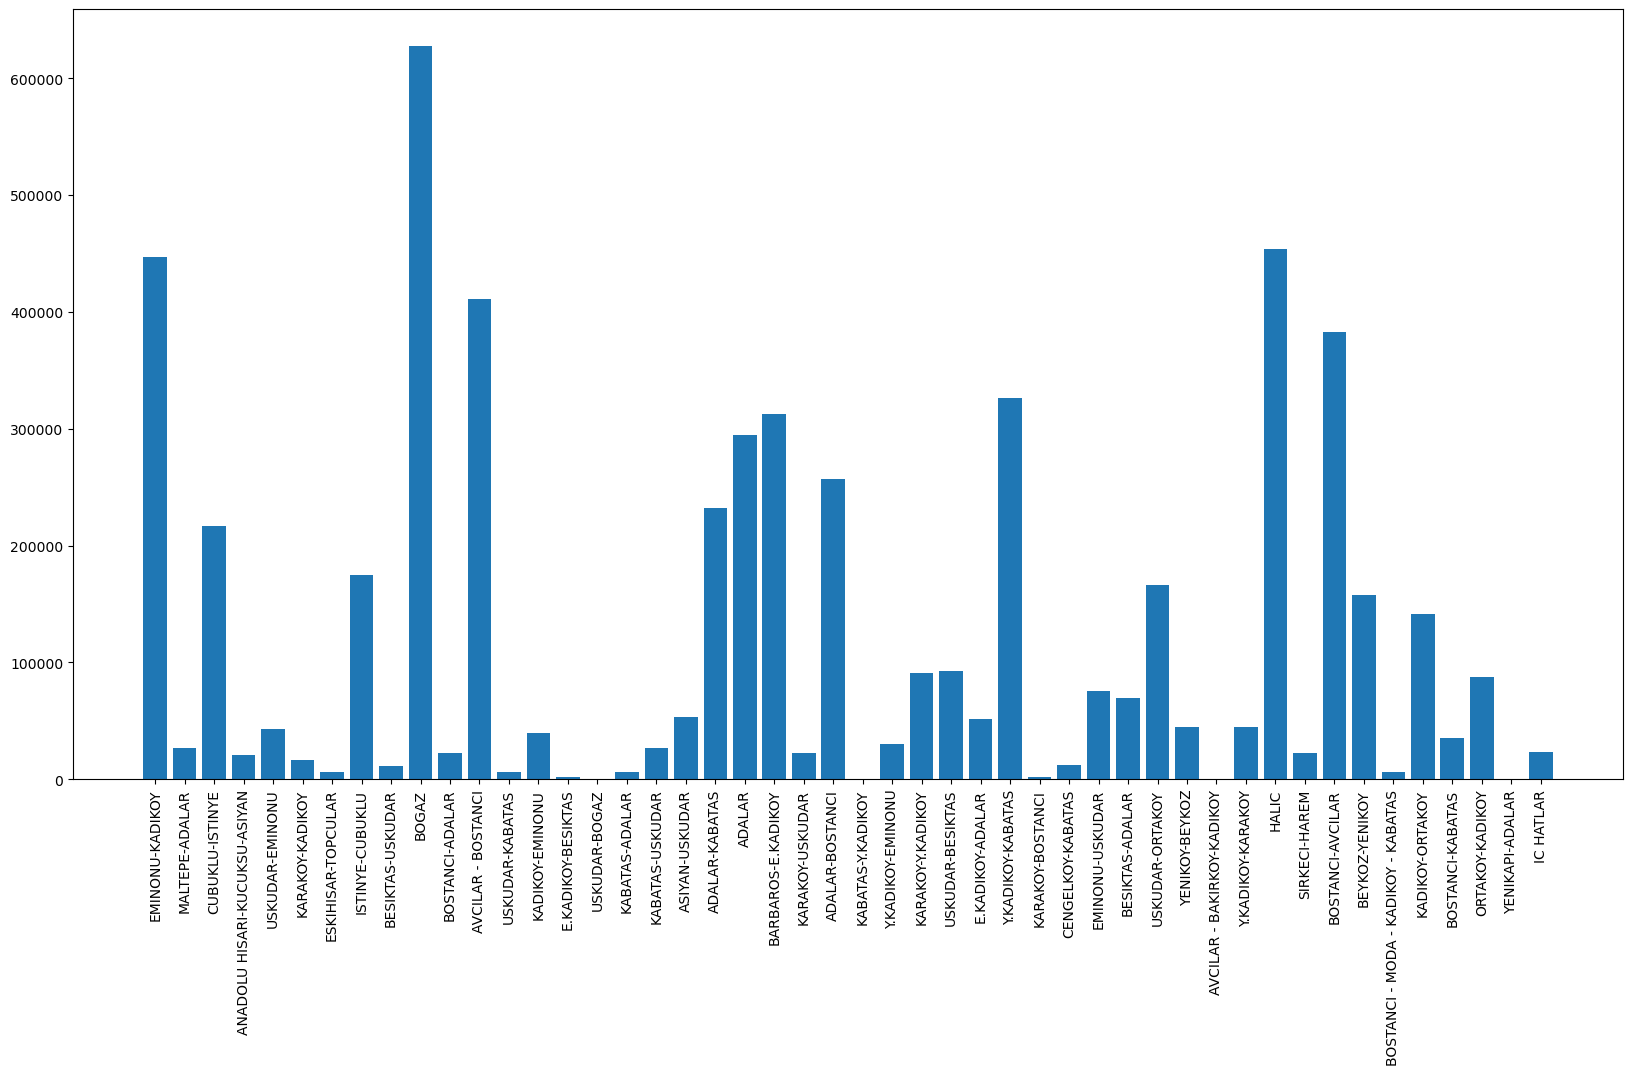

In [6]:
# create a bar graph for lines with the number of passengers
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar(lines, deniz.groupby('line')['number_of_passenger'].sum())
plt.xticks(rotation=90)
plt.show()


In [10]:
# Earliest and latest transition date
print("Earliest transition date: ", deniz['transition_date'].min())
print("Latest transition date: ", deniz['transition_date'].max())

Earliest transition date:  2023-09-01
Latest transition date:  2023-09-30


In [11]:
# Calculate density ( current number_of_passenger / maximum of number_of_passenger of line in all times ) for each line for each transition_hour, and find day of week and add it to the dataframe

df = deniz.copy()
df['density'] = df['number_of_passenger'] / df.groupby('line')['number_of_passenger'].transform('max')
df['day_of_week'] = pd.to_datetime(df['transition_date']).dt.day_name()
df

,_id,transition_date,transition_hour,transport_type_id,road_type,line,transfer_type,number_of_passage,number_of_passenger,density,day_of_week
27,28,2023-09-17,17,3,DENZ,EMINONU-KADIKOY,Aktarma,6,6,0.008955,Sunday
55,56,2023-09-17,16,3,DENZ,MALTEPE-ADALAR,Aktarma,1,1,0.007519,Sunday
68,69,2023-09-14,17,3,DENZ,CUBUKLU-ISTINYE,Aktarma,4,4,0.052632,Thursday
89,90,2023-09-22,12,3,DENZ,ANADOLU HISARI-KUCUKSU-ASIYAN,Normal,1,1,0.010526,Friday
91,92,2023-09-19,19,3,DENZ,USKUDAR-EMINONU,Aktarma,25,25,0.042955,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
4200571,4200572,2023-09-13,10,3,DENZ,KABATAS-Y.KADIKOY,Normal,2,2,0.009009,Wednesday
4200590,4200591,2023-09-07,20,3,DENZ,ADALAR,Normal,93,93,0.113831,Thursday
4200594,4200595,2023-09-12,16,3,DENZ,ANADOLU HISARI-KUCUKSU-ASIYAN,Normal,3,3,0.031579,Tuesday
4200595,4200596,2023-09-21,15,3,DENZ,ADALAR,Aktarma,9,9,0.011016,Thursday


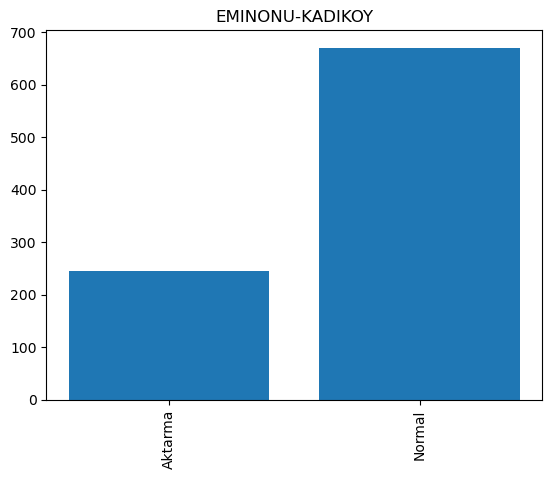

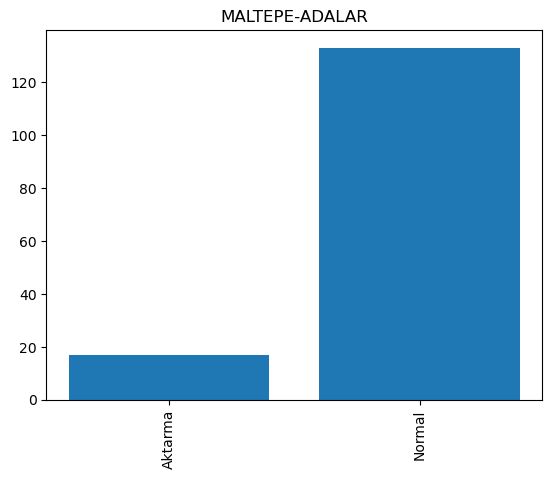

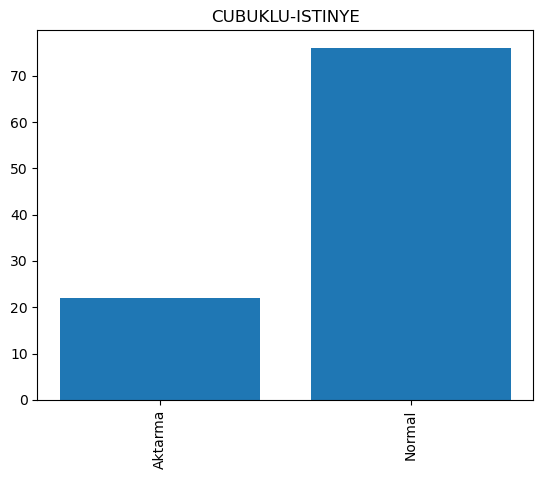

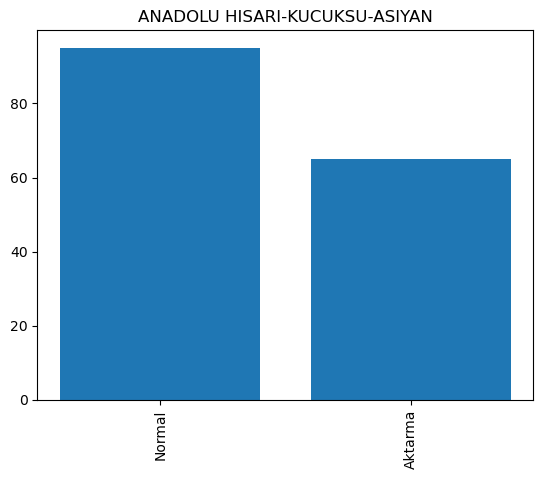

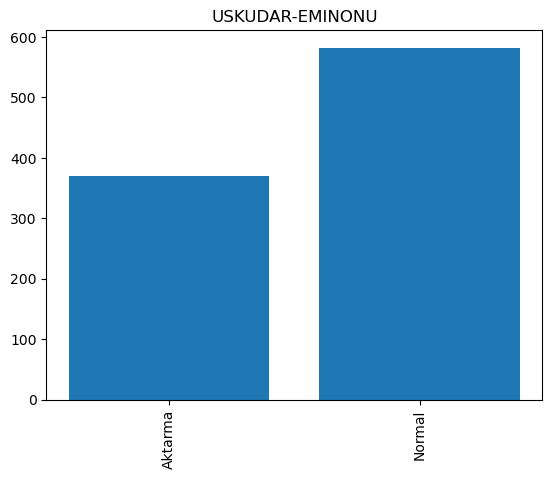

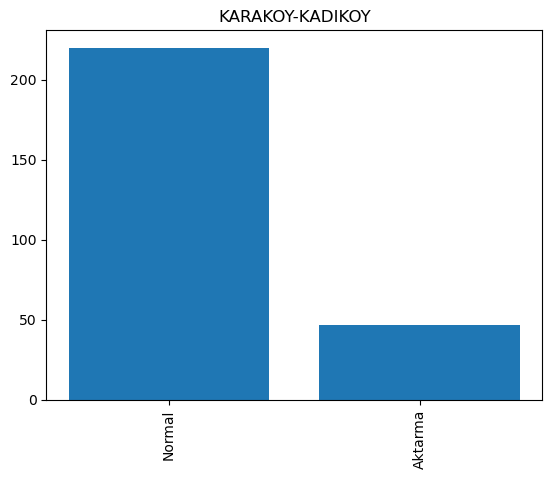

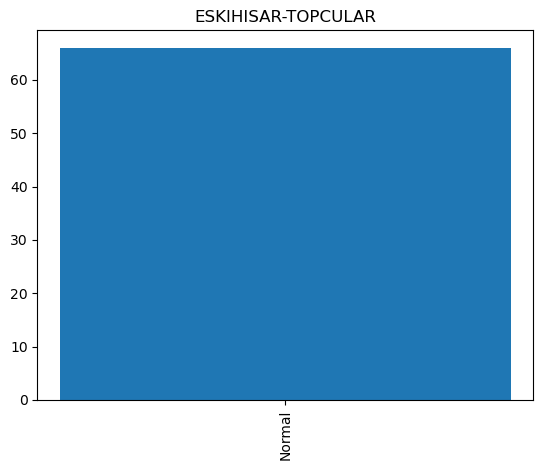

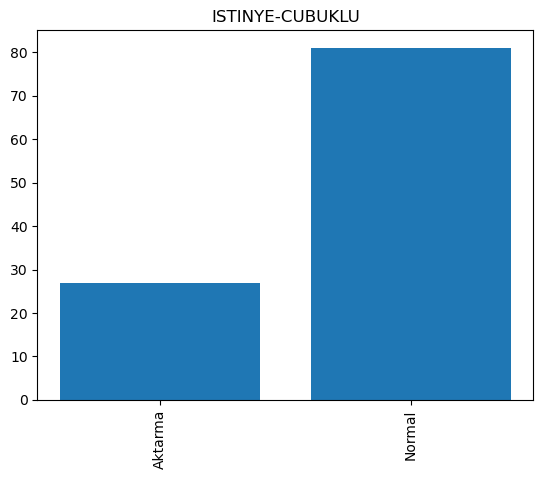

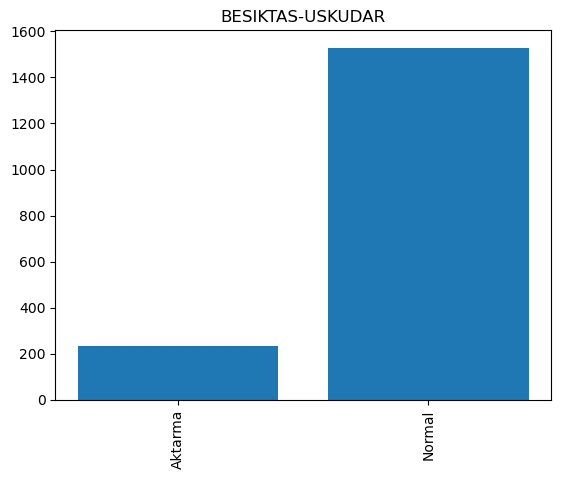

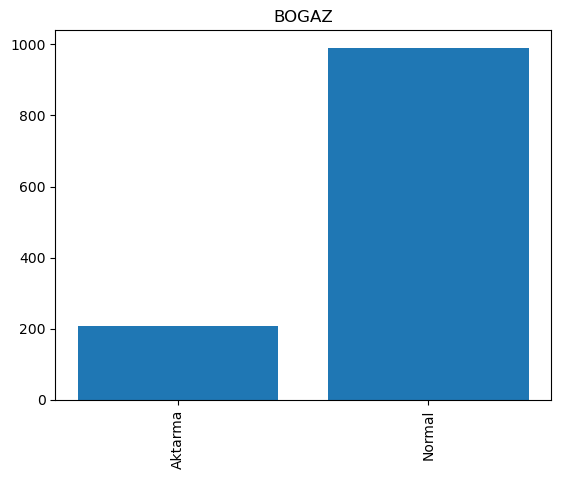

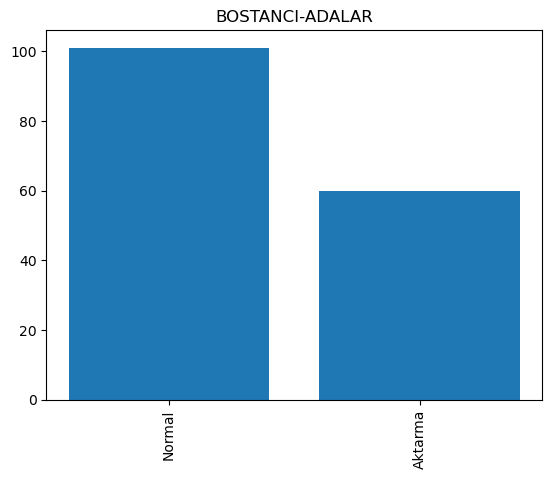

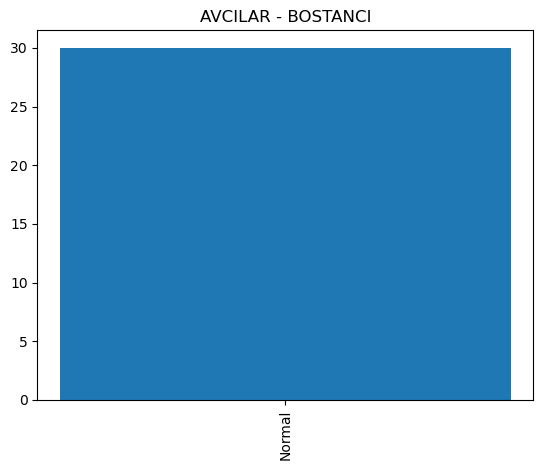

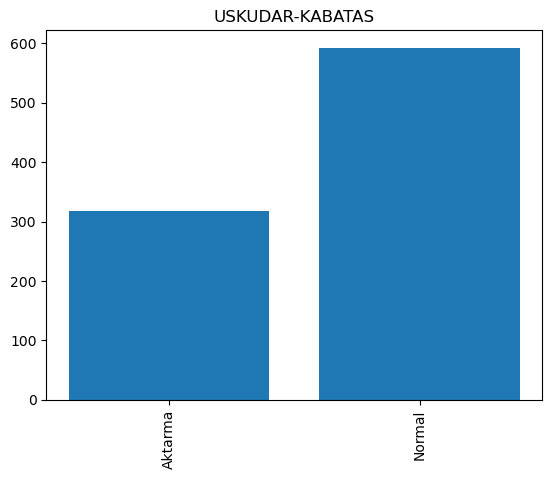

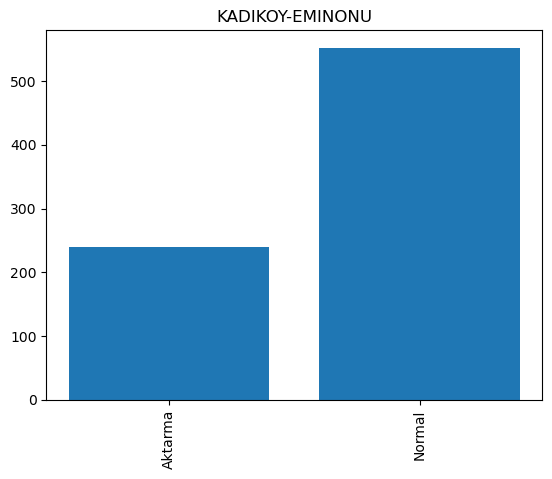

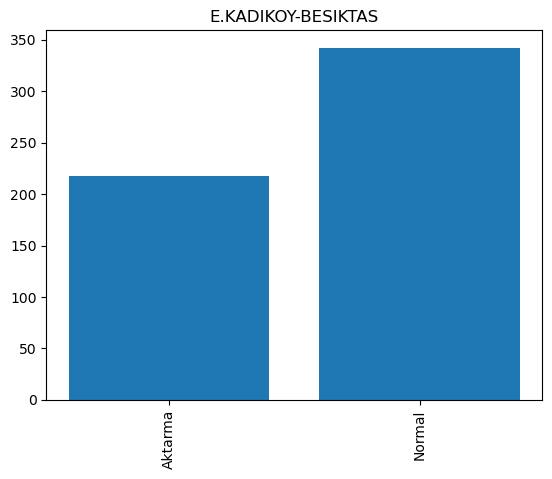

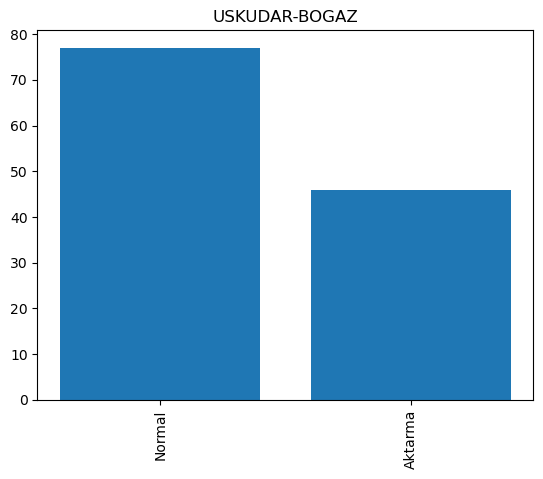

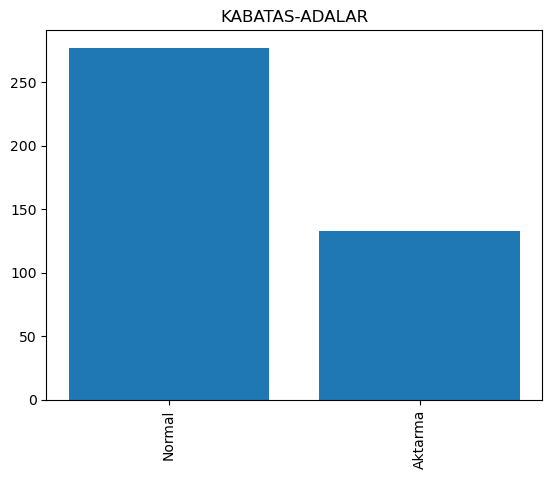

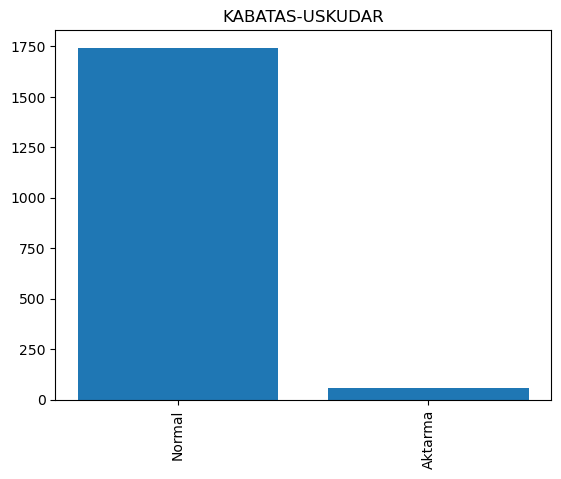

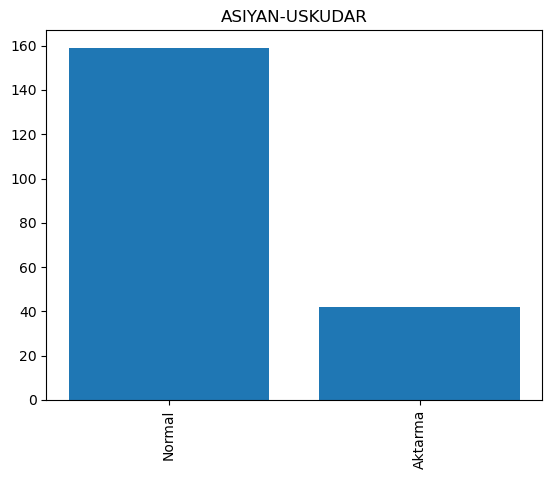

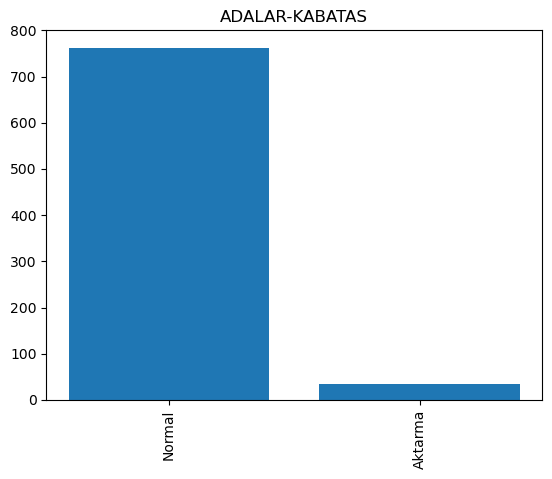

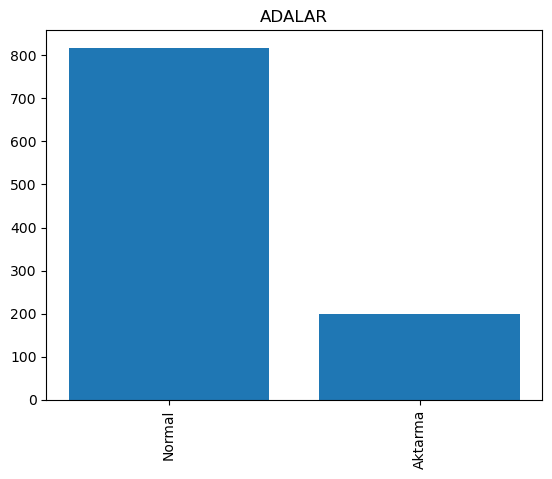

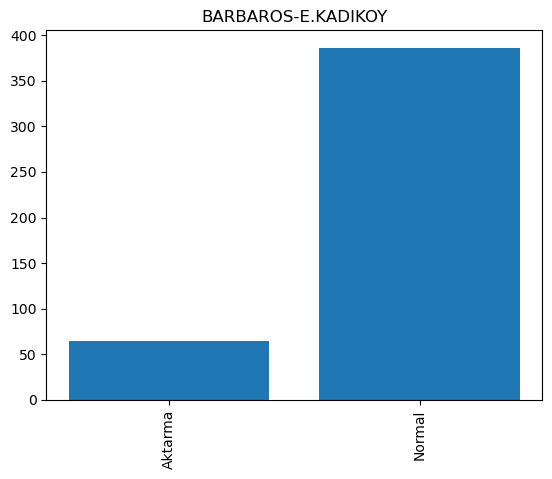

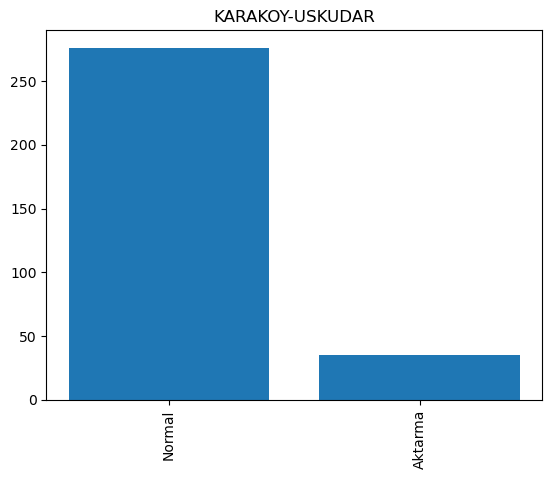

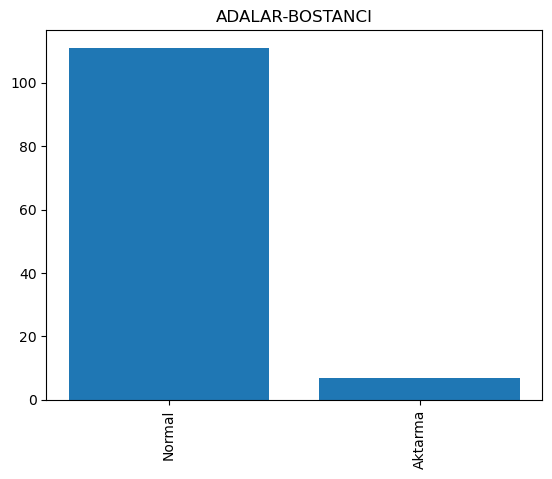

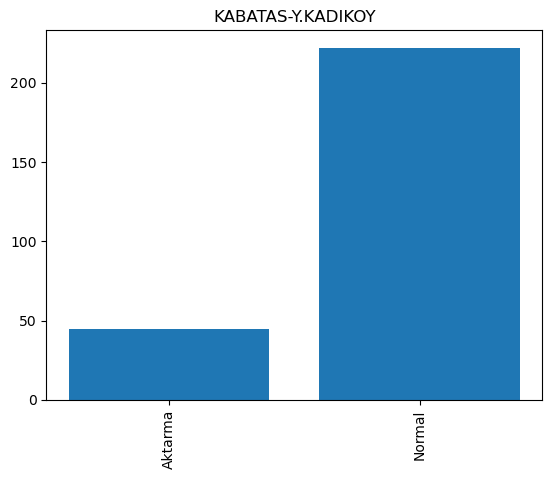

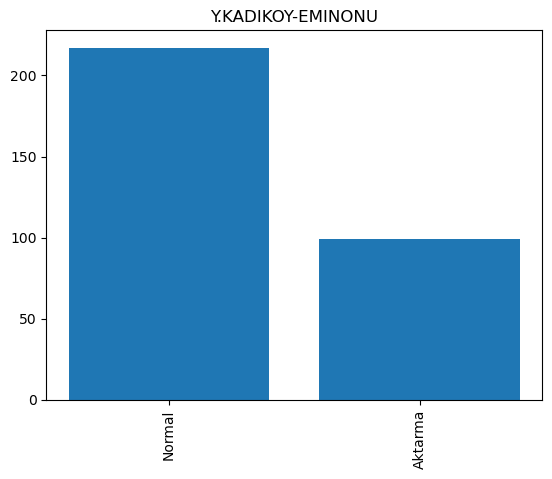

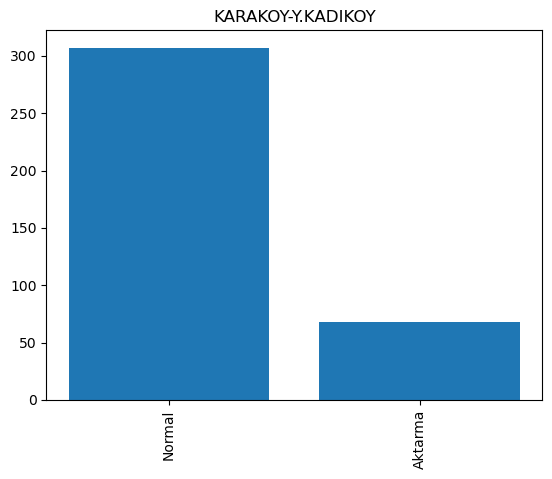

KeyboardInterrupt: 

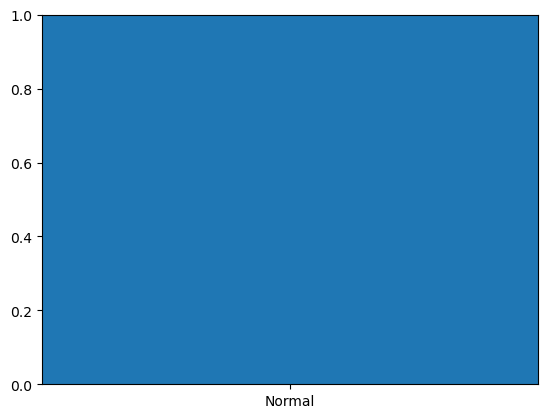

In [9]:
# create a bar graphs  for each line in lines for the transfer_type is "Normal" or "Aktarma" and add title to each graph

for line in lines:
    plt.bar(deniz[deniz['line'] == line].transfer_type, deniz[deniz['line'] == line].number_of_passenger)
    plt.xticks(rotation=90)
    plt.title(line)
    plt.show()


In [12]:
# find the line of most "Aktarma" transfer_type 
deniz[deniz['transfer_type'] == 'Aktarma'].groupby('line')['number_of_passenger'].sum().idxmax()

'USKUDAR-BESIKTAS'

In [13]:
# find the line of most "Normal" transfer_type
deniz[deniz['transfer_type'] == 'Normal'].groupby('line')['number_of_passenger'].sum().idxmax()

'BESIKTAS-USKUDAR'

In [14]:
# find the top 3 lines of most crowded in the between 6 and 10
deniz[(deniz['transition_hour'] >= 6) & (deniz['transition_hour'] <= 10)].groupby('line')[
    'number_of_passenger'].sum().nlargest(3)

line
USKUDAR-BESIKTAS    133153
ADALAR              102319
USKUDAR-EMINONU     101181
Name: number_of_passenger, dtype: int64

In [16]:
# find the top 3 lines of most crowded in the between 16 and 18
deniz[(deniz['transition_hour'] >= 16) & (deniz['transition_hour'] <= 18)].groupby('line')[
    'number_of_passenger'].sum().nlargest(3)

line
BESIKTAS-USKUDAR    209477
BOGAZ               162636
EMINONU-USKUDAR     119295
Name: number_of_passenger, dtype: int64